In [12]:
# Load dataset
file_path = "/content/newupdatedgoals.csv"
df = pd.read_csv(file_path)

In [13]:
# Drop unwanted columns
drop_cols = ["Season", "Rank", "Player", "Club", "Penalty_Goals", "Non-Penalty_Goals"]
df = df.drop(columns=drop_cols)


In [14]:
# Encode categorical feature
le = LabelEncoder()
df["Position"] = le.fit_transform(df["Position"])

In [15]:
# Define features (X) and target (y)
X = df.drop(columns=["Goals"])
y = df["Goals"]

In [16]:
# Handle missing values with median imputation
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Define models
rf = RandomForestRegressor(n_estimators=200, random_state=42)
gb = GradientBoostingRegressor(n_estimators=200, random_state=42)

In [19]:
# Train models
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)


In [20]:
# Evaluation metrics
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.2f}\n")


In [21]:
# Print performance
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)

Random Forest Performance:
  MAE: 0.72
  RMSE: 1.15
  R²: 0.93

Gradient Boosting Performance:
  MAE: 0.64
  RMSE: 0.93
  R²: 0.96



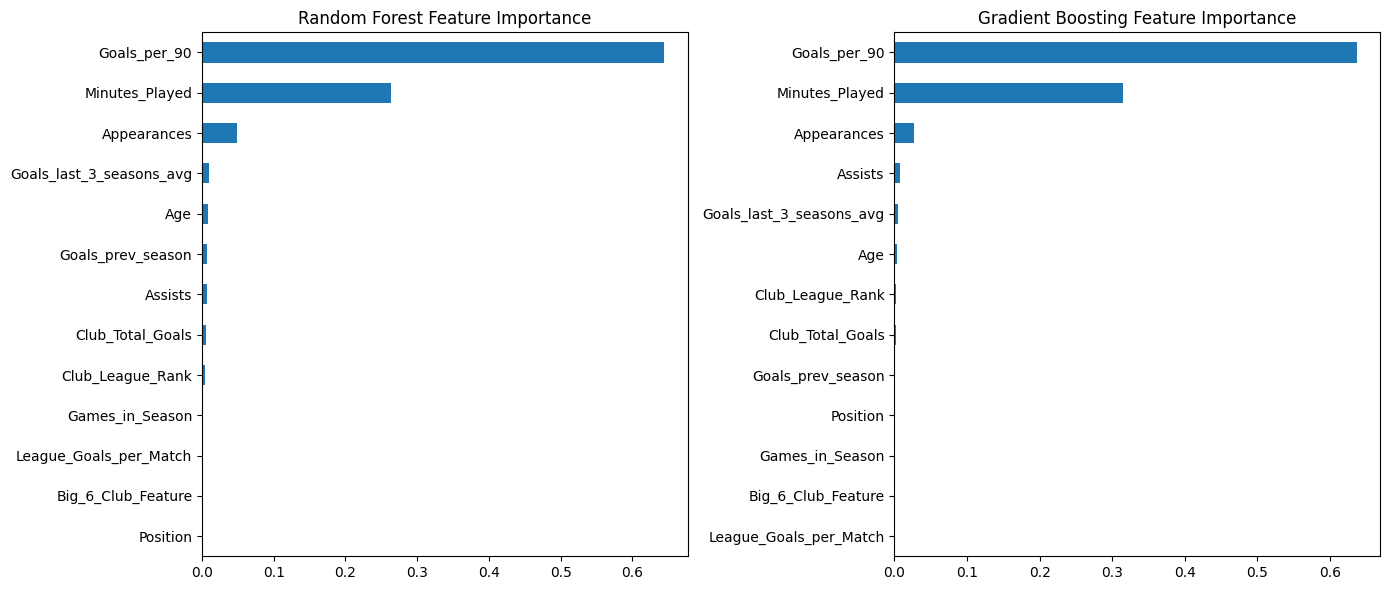

In [22]:
# Feature importance
rf_importance = pd.Series(rf.feature_importances_, index=X.columns)
gb_importance = pd.Series(gb.feature_importances_, index=X.columns)

# Plot feature importance comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

rf_importance.sort_values().plot(kind="barh", ax=axes[0], title="Random Forest Feature Importance")
gb_importance.sort_values().plot(kind="barh", ax=axes[1], title="Gradient Boosting Feature Importance")

plt.tight_layout()
plt.show()